In [173]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kb_python.utils import import_matrix_as_anndata
from sklearn.linear_model import LinearRegression
from upsetplot import from_contents, from_indicators
from upsetplot import plot as upset
from scipy.stats import ttest_ind_from_stats
from mx.mx_inspect import mx_inspect_rows, mx_inspect_cols
import muon
import anndata 
fsize = 15
import sys

def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, c="k", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax


plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

In [175]:
mu = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/issaacseq/hgmm/mu.h5mu")

In [176]:
muon.pp.intersect_obs(mu)

In [177]:
print(mu.mod["atac"].shape,mu.mod["gene"].shape, sep="\n")

(114357, 160977)
(114357, 117674)


In [178]:
blue = "#34CBBF"
red = "#CB3440"

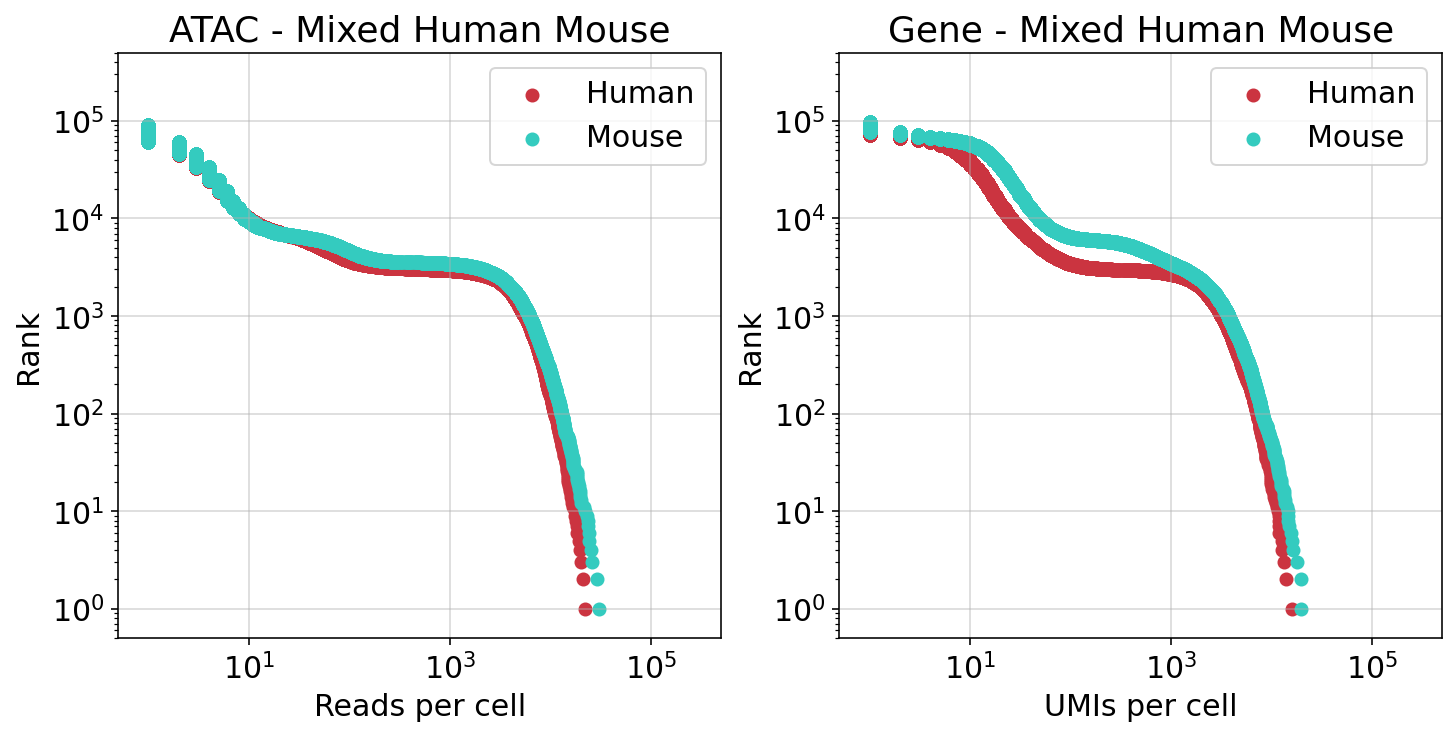

In [179]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, constrained_layout=True)

ax = axs[0]
x = mu.obs["atac:human_counts_nnzero"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Human", c=red)

x = mu.obs["atac:mouse_counts_nnzero"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Mouse", c=blue)

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Reads per cell",
    "ylabel": "Rank",
    "title": "ATAC - Mixed Human Mouse",
    "xlim": (0.5, 5e5),
    "ylim": (0.5, 5e5),
})
ax.legend()
ax.grid(alpha=0.5)
ax = axs[1]
x = mu.obs["gene:human_counts_sum"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Human", c=red)

x = mu.obs["gene:mouse_counts_sum"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Mouse", c=blue)

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "UMIs per cell",
    "ylabel": "Rank",
    "title": "Gene - Mixed Human Mouse",
    "xlim": (0.5, 5e5),
    "ylim": (0.5, 5e5)
})
ax.grid(alpha=0.5)
# fig.savefig("figures/issaacseq_hgmm_kneeplot.png", bbox_inches="tight", dpi=300)
ax.legend()
fig.show()

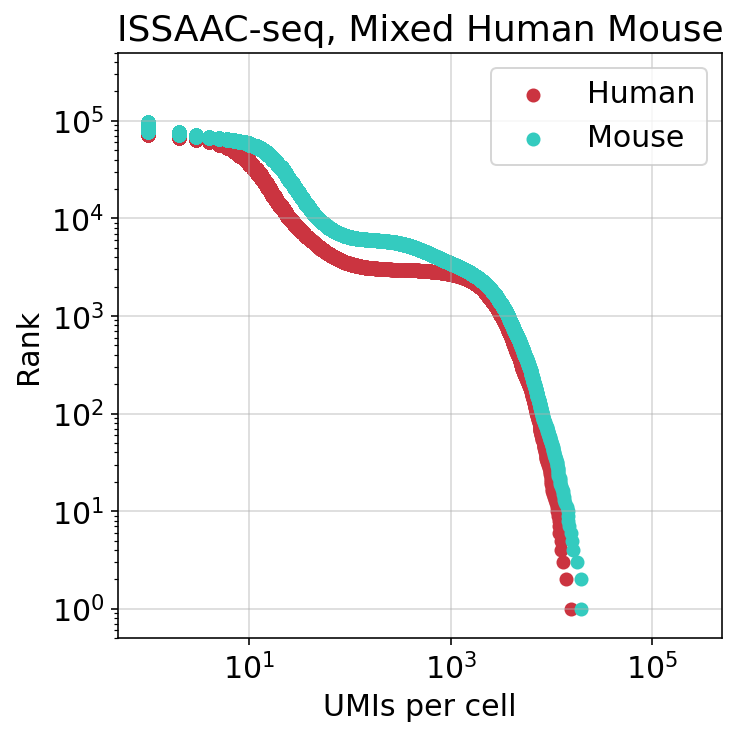

In [195]:
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)

x = mu.obs["gene:human_counts_sum"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Human", c=red)

x = mu.obs["gene:mouse_counts_sum"].sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Mouse", c=blue)

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "UMIs per cell",
    "ylabel": "Rank",
    "title": "ISSAAC-seq, Mixed Human Mouse",
    "xlim": (0.5, 5e5),
    "ylim": (0.5, 5e5)
})
ax.grid(alpha=0.5)
ax.legend()
fig.savefig("figures/issaacseq_hgmm_kneeplot_umis.png", bbox_inches="tight", dpi=300)

fig.show()

In [180]:
nr_atac = 615_070_551
nr_gene = 802_655_419

nr_gene / nr_atac 

1.304981058993995

In [326]:
human_co = 1e3
mouse_co = 8e2

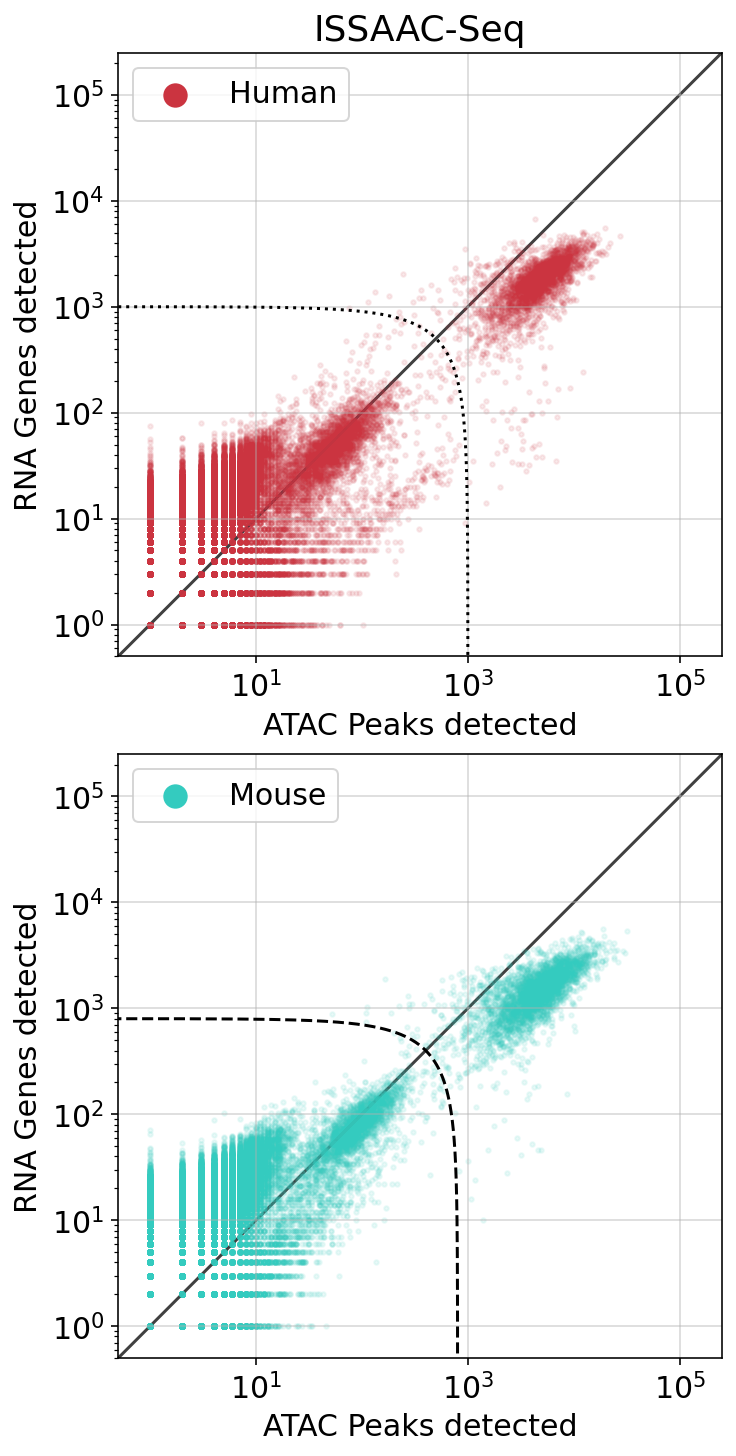

In [182]:
fig, axs = plt.subplots(figsize=(5,10), nrows=2, constrained_layout=True)

ax = axs[0]
x = mu.obs["atac:human_counts_nnzero"]
y = mu.obs["gene:human_counts_nnzero"]

ax.scatter(x,y, s=5, color=red, alpha=0.1, label="Human")

xx = np.arange(x.min(), x.max())
y = -xx + human_co
ax.plot(xx, y, color="k", linestyle="dotted")

ax.set(**{
    "title": "ISSAAC-Seq",
    "xlabel": "ATAC Peaks detected",
    "ylabel": "RNA Genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5, 2.5e5),
    "ylim": (0.5, 2.5e5)
})
yex(ax)
ax.grid(alpha=0.5)
for lh in ax.legend(markerscale=5).legendHandles: 
    lh.set_alpha(1)

ax = axs[1]
x = mu.obs["atac:mouse_counts_nnzero"]
y = mu.obs["gene:mouse_counts_nnzero"]

ax.scatter(x,y, s=5, color=blue, alpha=0.1, label="Mouse")

xx = np.arange(x.min(), x.max())
y = -xx + mouse_co
ax.plot(xx, y, color="k", linestyle="--")


ax.set(**{
    "xlabel": "ATAC Peaks detected",
    "ylabel": "RNA Genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5, 2.5e5),
    "ylim": (0.5, 2.5e5)
})
for lh in ax.legend(markerscale=5).legendHandles: 
    lh.set_alpha(1)
# ax.legend()
yex(ax)
ax.grid(alpha=0.5)
fig.savefig("figures/issaacseq_hgmm_tradeoff.png", bbox_inches="tight", dpi=300)
fig.show()

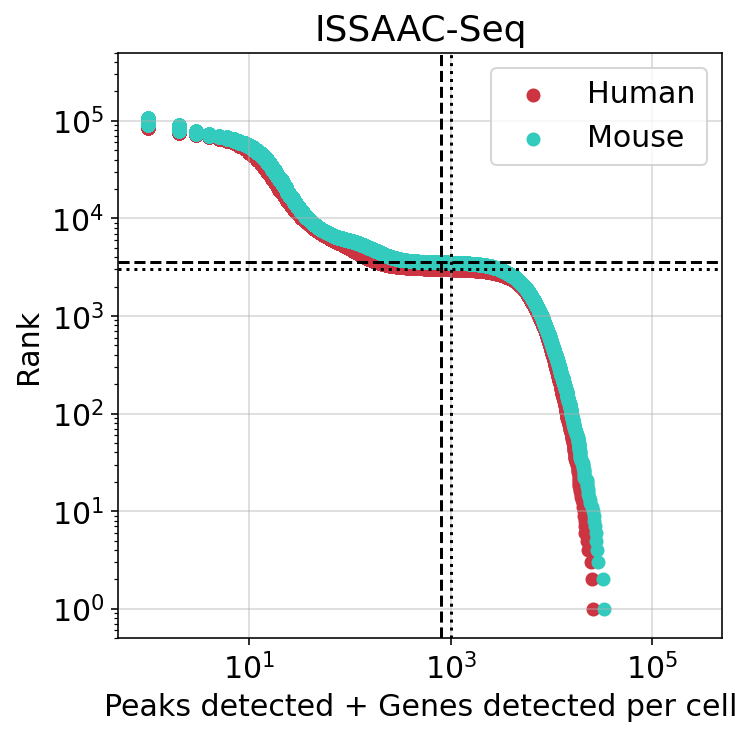

In [183]:
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)

x = (
    mu.obs["atac:human_counts_nnzero"] + 
    mu.obs["gene:human_counts_nnzero"]
).sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Human", c=red)


ax.axvline(human_co, color="k", linestyle="dotted")
nhuman = np.where(x<human_co)[0][0]
ax.axhline(nhuman, color="k", linestyle="dotted")

x = (
    mu.obs["atac:mouse_counts_nnzero"] + 
    mu.obs["gene:mouse_counts_nnzero"]
).sort_values(ascending=False)
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Mouse", c=blue)


ax.axvline(mouse_co, color="k", linestyle="--")
nmouse = np.where(x<mouse_co)[0][0]
ax.axhline(nmouse, color="k", linestyle="--")

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Peaks detected + Genes detected per cell",
    "ylabel": "Rank",
    "title": "ISSAAC-Seq",
    "xlim": (0.5, 5e5),
    "ylim": (0.5, 5e5)
})
ax.grid(alpha=0.5)
ax.legend()
fig.savefig("figures/issaacseq_hgmm_sum_kneeplot.png", bbox_inches="tight", dpi=300)

fig.show()

In [184]:
print(f"Gene: {mu.mod['gene'].X.sum():,.0f}")
print(f"ATAC: {mu.mod['atac'].X.sum():,.0f}")

Gene: 23,466,848
ATAC: 77,496,248


In [185]:
nmouse, nhuman

(3556, 2998)

In [186]:
# what fraction of umis come from cells that pass filter?

In [187]:
mask = (mu.obs["atac:mouse_counts_nnzero"] + 
        mu.obs["gene:mouse_counts_nnzero"]) > mouse_co
mm_good_sum = mu[mask].copy().obs["gene:mouse_counts_sum"].sum()
fmm = mm_good_sum / mu.obs["gene:mouse_counts_sum"].sum()

In [188]:
mask = (mu.obs["atac:human_counts_nnzero"] + 
        mu.obs["gene:human_counts_nnzero"]) > human_co
hg_good_sum = mu[mask].copy().obs["gene:human_counts_sum"].sum()
fhg = hg_good_sum / mu.obs["gene:human_counts_sum"].sum()

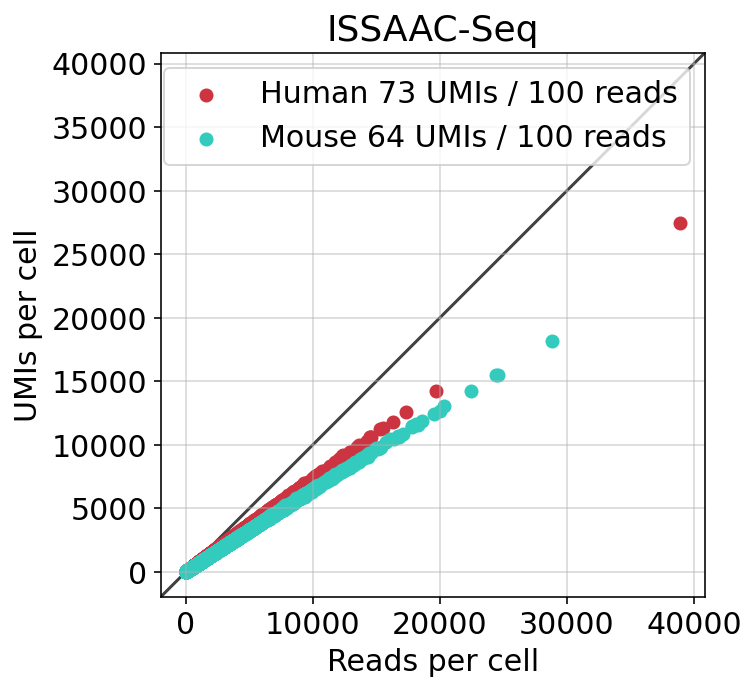

In [192]:
fig, ax = plt.subplots(figsize=(5,5))

x = mu.obs["gene:human_reads_sum"].values
y = mu.obs["gene:human_counts_sum"].values*fhg

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, color=red, label=f"Human {int(reg.coef_[0]*100):,.0f} UMIs / 100 reads")

x = mu.obs["gene:mouse_reads_sum"].values
y = mu.obs["gene:mouse_counts_sum"].values*fmm

lx, ly = x.reshape(-1,1), y
reg = LinearRegression().fit(lx, ly)
r2 = reg.score(lx, ly)

ax.scatter(x,y, color=blue, label=f"Mouse {int(reg.coef_[0]*100):,.0f} UMIs / 100 reads")

kwd = {
    "title": "ISSAAC-Seq",
    "xscale": "linear",
    "yscale": "linear",
    "xlabel": f"Reads per cell",
    "ylabel": f"UMIs per cell",
}
ax.set(**kwd)
ax.legend(loc='upper right')
yex(ax)
ax.grid(alpha=0.5)
fig.savefig("figures/issaacseq_hgmm_read_umi.png", bbox_inches="tight", dpi=300)

fig.show()

ATAC:  477
Gene:  468


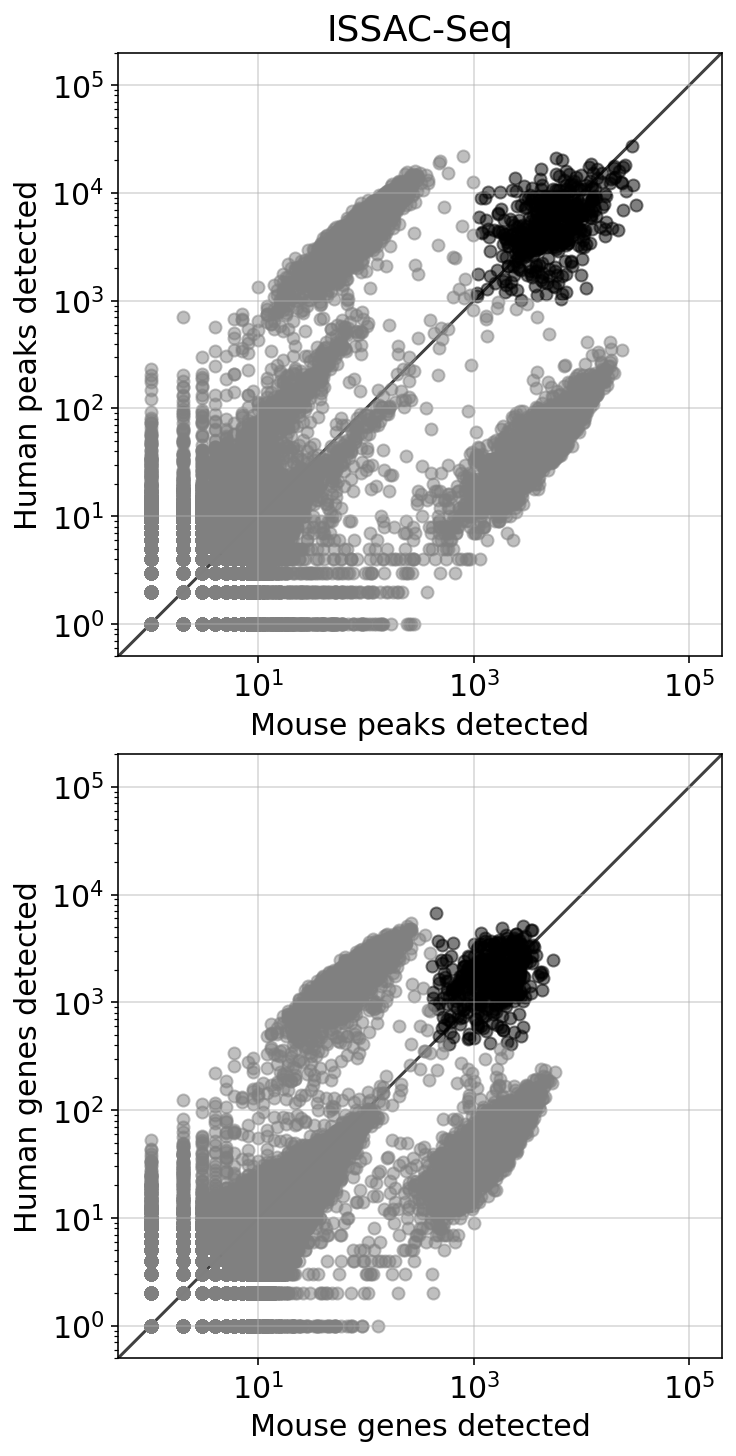

In [191]:
fig, axs = plt.subplots(figsize=(5,10), nrows=2, constrained_layout=True)

ax = axs[0]
x = mu.obs["atac:mouse_counts_nnzero"]
y = mu.obs["atac:human_counts_nnzero"]

m = np.logical_and(x>1000, y>1000)
print("ATAC: ", m.sum())
ax.scatter(x[m],y[m],      color="k", alpha=0.5)
ax.scatter(x[~m],y[~m], color="grey", alpha=0.5)

ax.set(**{
    "title": "ISSAC-Seq",
    "xlabel": "Mouse peaks detected",
    "ylabel": "Human peaks detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5,2*1e5)
})
yex(ax)
ax.grid(alpha=0.5)

ax = axs[1]
x = mu.obs["gene:mouse_counts_nnzero"]
y = mu.obs["gene:human_counts_nnzero"]

m = np.logical_and(x>400, y>400)
print("Gene: ", m.sum())
ax.scatter(x[m],y[m],      color="k", alpha=0.5)
ax.scatter(x[~m],y[~m], color="grey", alpha=0.5)

ax.set(**{
    "xlabel": "Mouse genes detected",
    "ylabel": "Human genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5,2*1e5)
})
yex(ax)
ax.grid(alpha=0.5)
fig.savefig("figures/issaacseq_hgmm_clawplot.png", bbox_inches="tight", dpi=300)
fig.show()

ATAC:  495


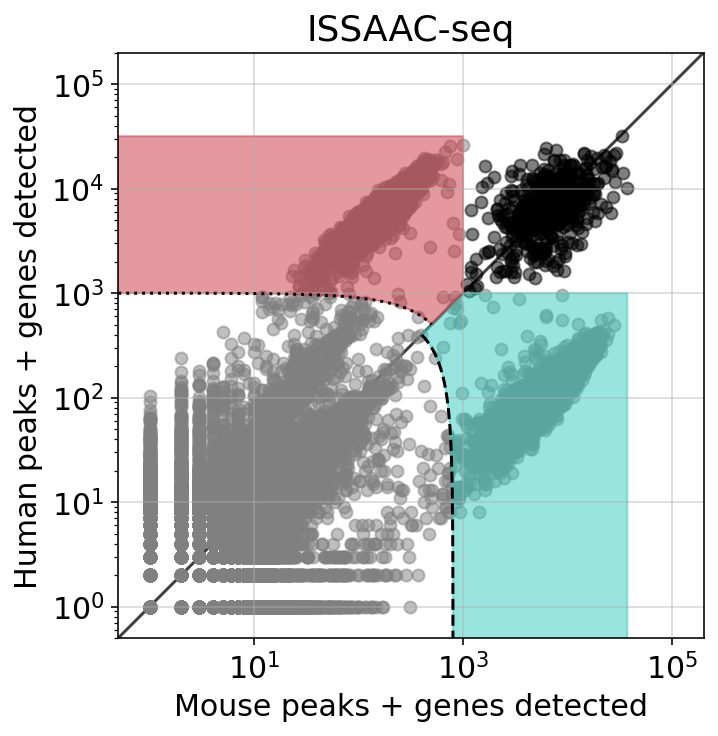

In [213]:
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)

x = mu.obs["atac:mouse_counts_nnzero"] + mu.obs["gene:mouse_counts_nnzero"] 
y = mu.obs["atac:human_counts_nnzero"] + mu.obs["gene:human_counts_nnzero"]

co_max = 1000

m = np.logical_and(x>co_max, y>co_max)
print("ATAC: ", m.sum())
ax.scatter(x[m],y[m],      color="k", alpha=0.5)
ax.scatter(x[~m],y[~m], color="grey", alpha=0.5)

xx = np.arange(x.min(), x.max())

# Upper cutoff mouse
yh = [co_max]*len(xx)
# ax.plot(xx, yh, color="red", linestyle="-")

# lower cutoff mouse
yl = -xx + mouse_co
ax.plot(xx[xx>mouse_co/2], yl[xx>mouse_co/2], color="k", linestyle="--")

ax.fill_between(
    xx[xx>mouse_co/2], 
    yl[xx>mouse_co/2], 
    np.min(np.vstack([xx, yh]), axis=0)[xx>mouse_co/2], alpha=0.5, color=blue)

# upper cutoff human
xh = [co_max]*len(yy)
# ax.plot(xh, yy, color="k", linestyle="--")

# lower cutoff human
yl = -xx + human_co
ax.plot(xx[xx<human_co/2], yl[xx<human_co/2], color="k", linestyle="dotted")


ax.fill_between(xx[xx<co_max], 
                np.max(np.vstack([xx, yl]), axis=0)[xx<co_max], 
                [y.max()]*len(xx[xx<co_max]), alpha=0.5, color=red)

ax.set(**{
    "title": "ISSAAC-seq",
    "xlabel": "Mouse peaks + genes detected",
    "ylabel": "Human peaks + genes detected",
    "xscale": "log",
    "yscale": "log",
    "xlim": (0.5,2*1e5)
})
yex(ax)
ax.grid(alpha=0.5)

fig.savefig("figures/issaacseq_hgmm_clawplot_combined.png", bbox_inches="tight", dpi=300)
fig.show()

In [211]:
print(f"Max:   {co_max}", f"human: {human_co}", f"mouse: {mouse_co}", sep="\n")


Max:   1000
human: 1000.0
mouse: 800.0
